# Curso Introdução Data Science - Alura

In [ ]:
import pandas as pd

In [ ]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#Linhas, colunas
notas.shape

(100836, 4)

In [ ]:
notas['nota'].head()

,nota
0,4.0
1,4.0
2,4.0
3,5.0
4,5.0


In [ ]:
#Todas as notas possíveis que foram dadas
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas.nota.value_counts()
#as boas práticas indicam escrevermos notas.['nota']

,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [ ]:
notas['nota'].mean()

np.float64(3.501556983616962)

<Axes: ylabel='Frequency'>

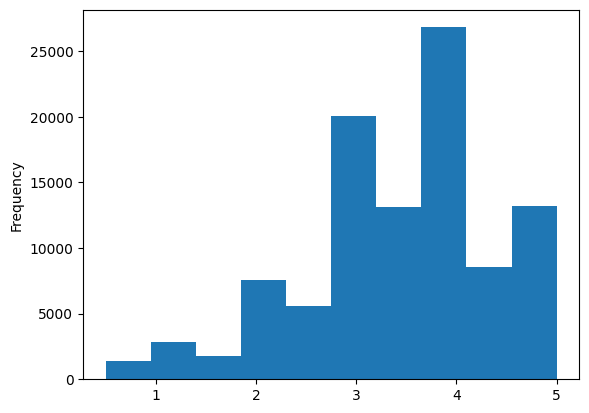

In [ ]:
notas['nota'].plot(kind='hist')

In [ ]:
mediana = notas['nota'].median()
media = notas['nota'].mean()
print(f'Mediana: {mediana}')
print(f'Média: {media}')

Mediana: 3.5
Média: 3.501556983616962


<Axes: ylabel='nota'>

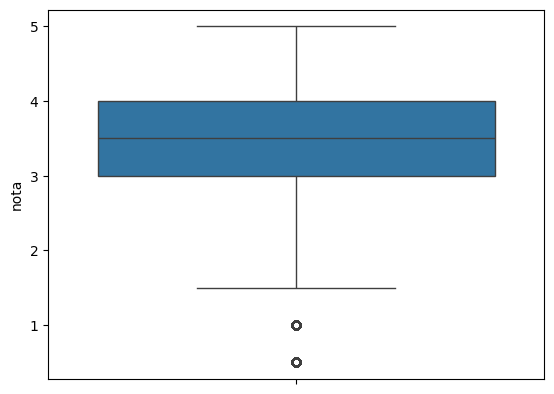

In [ ]:
import seaborn as sns
sns.boxplot(notas['nota'])

In [ ]:
#Criando um dataframe simples
dados = {
    'nome': ['Carlos', 'Theo', 'Raquel', 'Fernanda'],
    'idade': [35, 32, 15, 49],
    'cidade': ['Franca', 'Belém', 'Natal', 'Curitiba'],
    'comprou': [True, False, False, True]
}
df = pd.DataFrame(dados)
df

,nome,idade,cidade,comprou
0,Carlos,35,Franca,True
1,Theo,32,Belém,False
2,Raquel,15,Natal,False
3,Fernanda,49,Curitiba,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nome     4 non-null      object
 1   idade    4 non-null      int64 
 2   cidade   4 non-null      object
 3   comprou  4 non-null      bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 232.0+ bytes


In [ ]:
filmes = pd.read_csv('/content/drive/MyDrive/movies.csv')
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#Fazendo uma pesquisa ("query"): Média das notas do filme 1
notas.query('filmeId==1')['nota'].mean()

np.float64(3.9209302325581397)

In [ ]:
#Média das notas agrupado por filme
medias_por_filme = notas.groupby('filmeId')['nota'].mean()
medias_por_filme.head()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [ ]:
serenatto_dados = pd.read_csv('/content/drive/MyDrive/serenatto_2sem_2023.csv')
serenatto_dados.head()

,id,data,produto,valor,metodo_pagamento
0,2720,2023-07-01,Risoto de Funghi,13.0,Cartão de Débito
1,2721,2023-07-02,Tiramisù,10.0,Cartão de Débito
2,2722,2023-07-02,Tiramisù,10.0,Cartão de Crédito
3,2723,2023-07-02,Ratatouille,8.5,PIX
4,2724,2023-07-03,Ratatouille,8.5,Dinheiro


In [ ]:
# Somatório de todas as vendas de “Ratatouille” do período;
soma_ratatouille = serenatto_dados.query('produto == "Ratatouille"')['valor'].sum()

print(f'Soma de vendas de Ratatouille: {soma_ratatouille}')

Soma de vendas de Ratatouille: 323.0


In [ ]:
# Frequência dos métodos de pagamento para o “Ratatouille”.
freq_pagamento = serenatto_dados.query('produto == "Ratatouille"')['metodo_pagamento'].value_counts()

print(f'Frequência dos métodos de pagamento:\n {freq_pagamento}')

Frequência dos métodos de pagamento:
 metodo_pagamento
PIX                  13
Cartão de Débito     10
Dinheiro              9
Cartão de Crédito     6
Name: count, dtype: int64


In [ ]:
qntd_pagamento = serenatto_dados["metodo_pagamento"].value_counts()
qntd_pagamento = qntd_pagamento.to_frame().reset_index()
qntd_pagamento.columns = ["metodo_pagamento", "quantidade"]
qntd_pagamento

,metodo_pagamento,quantidade
0,PIX,246
1,Dinheiro,234
2,Cartão de Crédito,198
3,Cartão de Débito,178


Text(0.5, 1.0, 'Comparação dos métodos de pagamento do 2º semestre da Serenatto')

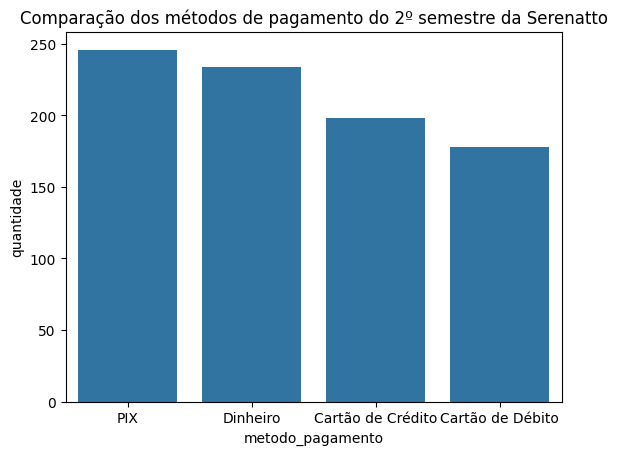

In [ ]:
import matplotlib.pyplot as plt
sns.barplot(data = qntd_pagamento, x="metodo_pagamento", y= "quantidade")
plt.title("Comparação dos métodos de pagamento do 2º semestre da Serenatto")

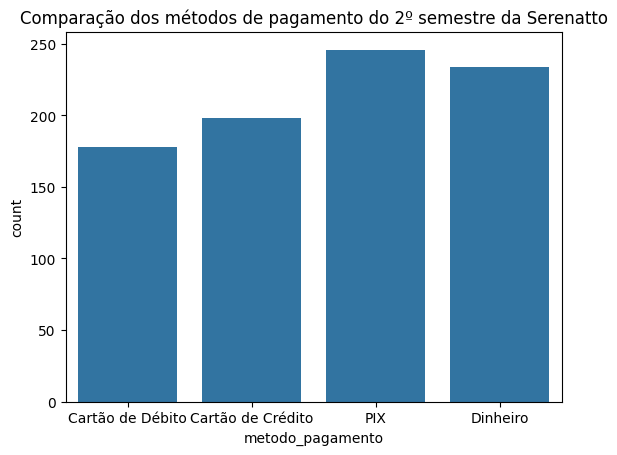

In [ ]:
sns.countplot(x="metodo_pagamento", data=serenatto_dados)
plt.title("Comparação dos métodos de pagamento do 2º semestre da Serenatto")
plt.show()

<Axes: ylabel='nota'>

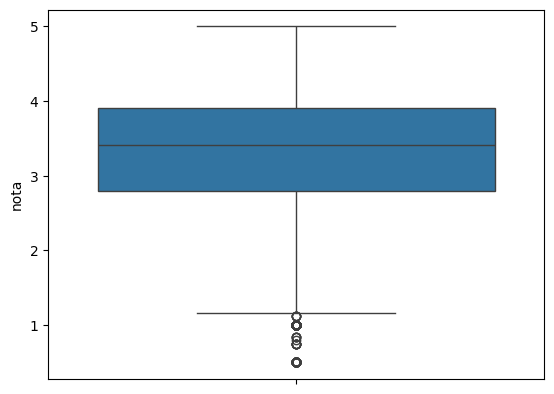

In [ ]:
sns.boxplot(medias_por_filme)

Text(-3.6805555555555554, 0.5, 'Frequência')

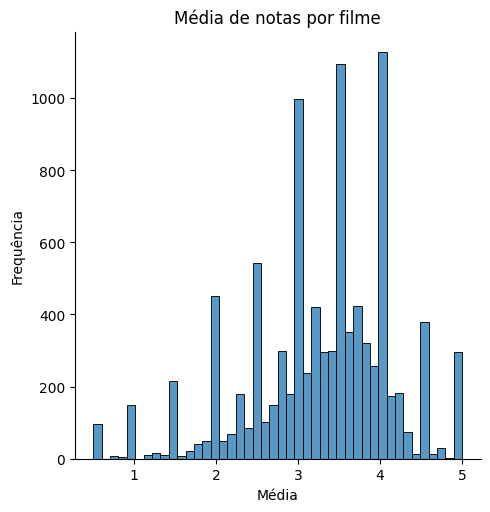

In [ ]:
import matplotlib.pyplot as plt

sns.displot(medias_por_filme)
plt.title('Média de notas por filme')
plt.xlabel('Média')
plt.ylabel('Frequência')

In [ ]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# Média das notas de Toy Story
notas.query("filmeId==1")['nota'].mean()

np.float64(3.9209302325581397)

In [ ]:
# Média das notas de Jumanji
notas.query("filmeId==2")['nota'].mean()

np.float64(3.4318181818181817)

In [ ]:
# média de todos filmes individualmente
medias_por_filme = notas.groupby('filmeId')['nota'].mean()
medias_por_filme.head()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [ ]:
tmdb = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


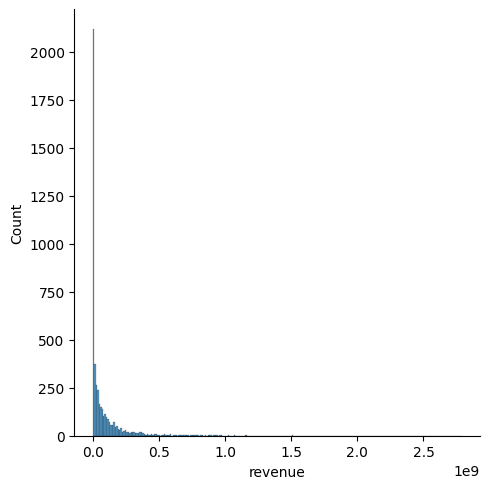

In [ ]:
sns.displot(tmdb['revenue'])

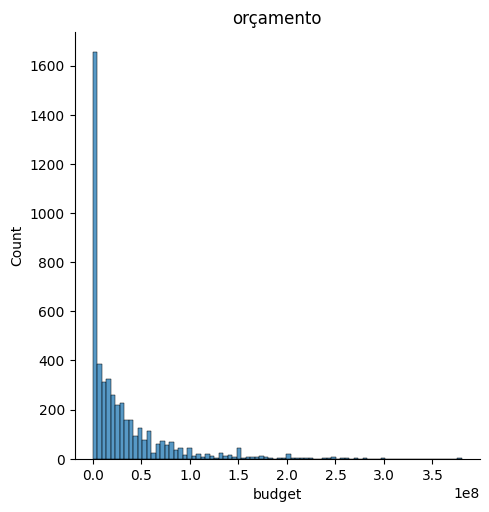

In [ ]:
sns.displot(tmdb['budget'])
plt.title('orçamento')
plt.show()

In [ ]:
com_faturamento = tmdb.query('revenue > 0')
com_faturamento.shape

(3376, 20)

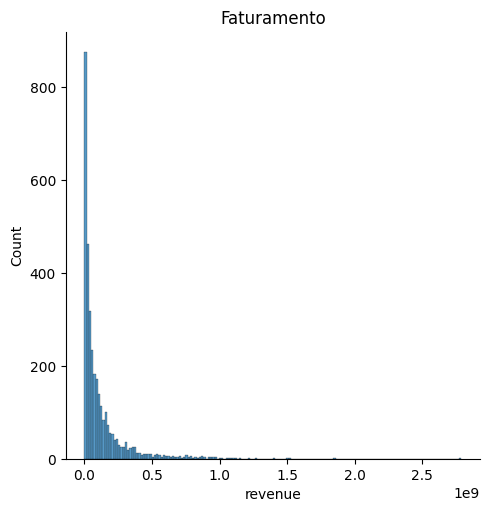

In [ ]:
sns.displot(com_faturamento['revenue'])
plt.title('Faturamento')
plt.show()

In [ ]:
tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
tmdb['original_language'].value_counts()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


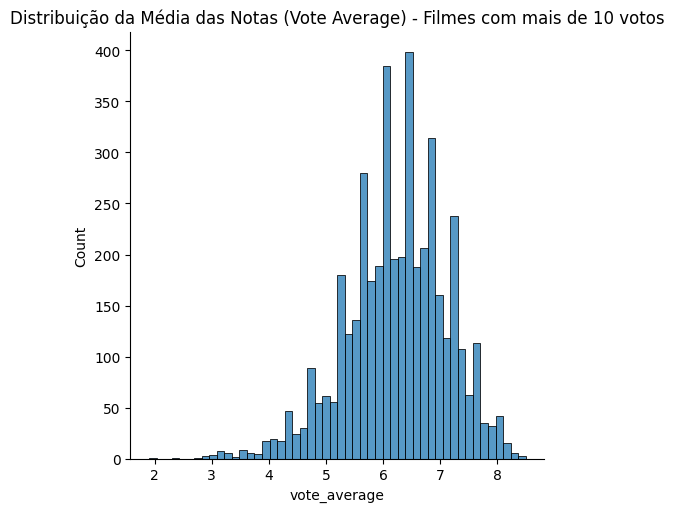

In [ ]:
#filmes com mais de 10 votos
tmdb_filtrado = tmdb.query('vote_count > 10')
#mostrar num gráfico a média das notas dessas filmes
sns.displot(tmdb_filtrado['vote_average'])
plt.title('Distribuição da Média das Notas (Vote Average) - Filmes com mais de 10 votos')
plt.show()


In [ ]:
tmdb["original_language"].value_counts().index #Toda serie tem o índice próprio dela

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'id', 'cs', 'ta', 'ro', 'ar', 'te',
       'hu', 'xx', 'af', 'is', 'tr', 'vi', 'pl', 'nb', 'ky', 'no', 'sl', 'ps',
       'el'],
      dtype='object', name='original_language')

In [ ]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [ ]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

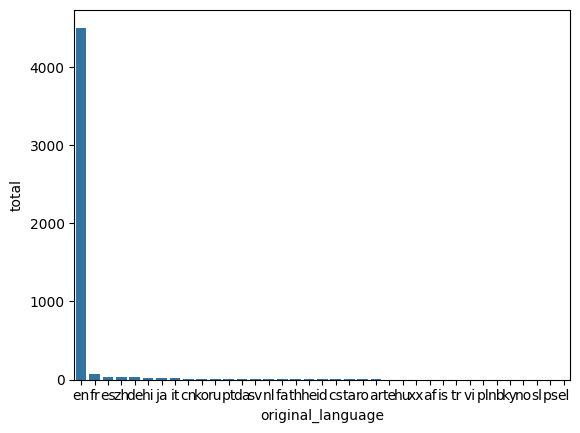

In [ ]:
sns.barplot(data = contagem_de_lingua, x = "original_language", y = "total")

<Axes: xlabel='original_language', ylabel='count'>

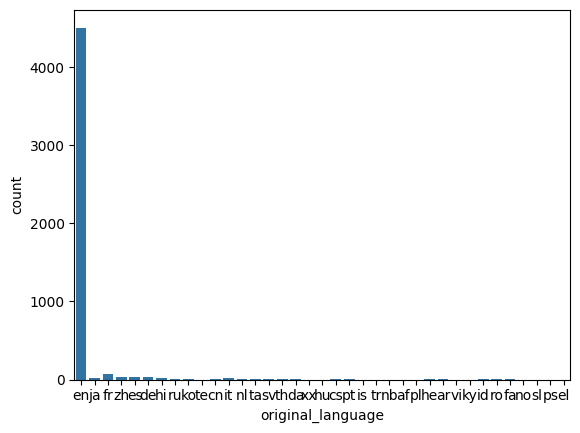

In [ ]:
sns.countplot(data = tmdb, x = "original_language") #Aqui ele já faz o value_counts

<Axes: ylabel='total'>

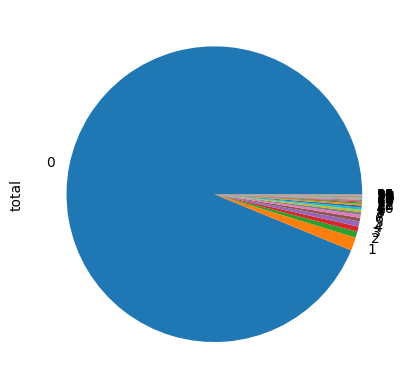

In [ ]:
contagem_de_lingua.plot(kind = "pie", y = "total", legend = False)

In [ ]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc["en"]
total_outros = total_geral - total_ingles
print(total_geral, total_ingles, total_outros)

4803 4505 298


In [ ]:
dados = {
    'lingua' : ['Inglês', 'Outros'],
    'total' : [total_ingles, total_outros]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,Inglês,4505
1,Outros,298


<Axes: xlabel='lingua', ylabel='total'>

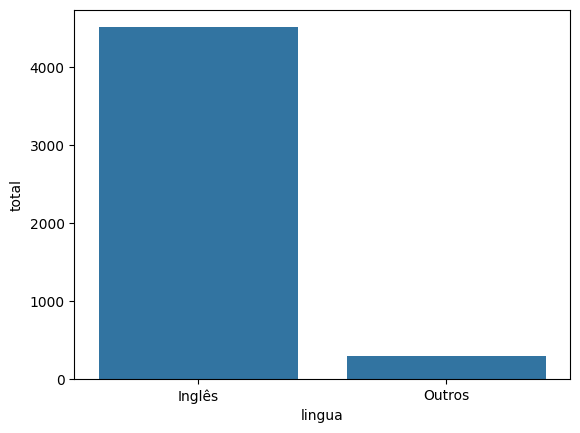

In [ ]:
sns.barplot(data = dados, x = "lingua", y = "total")

<Axes: ylabel='total'>

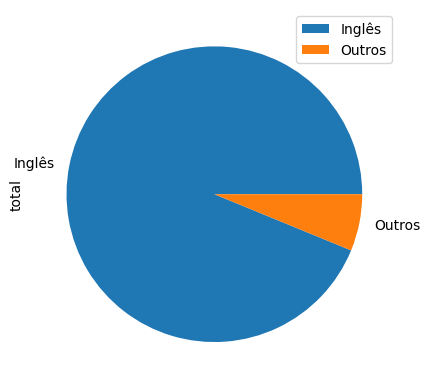

In [ ]:
dados.plot(kind="pie", y="total", labels = dados["lingua"])

In [ ]:
total_de_outros_filmes_por_lingua = tmdb.query("original_language != 'en'").original_language.value_counts()
total_de_outros_filmes_por_lingua.head(5)

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19


Quando você usa o Seaborn com sns.countplot(), o parâmetro x='' diz qual coluna do DataFrame vai para o eixo X do gráfico.

Ele conta automaticamente a frequência (quantidade) de cada valor único da coluna que você especificar, e gera um gráfico de barras com isso.

<Axes: xlabel='original_language', ylabel='count'>

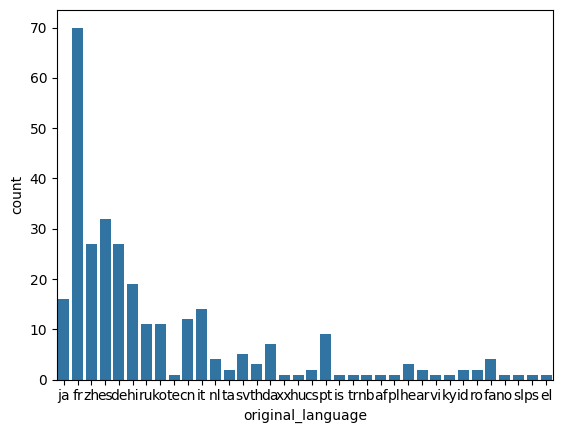

In [ ]:
sns.countplot(data=tmdb[tmdb['original_language'] != 'en'], x='original_language')

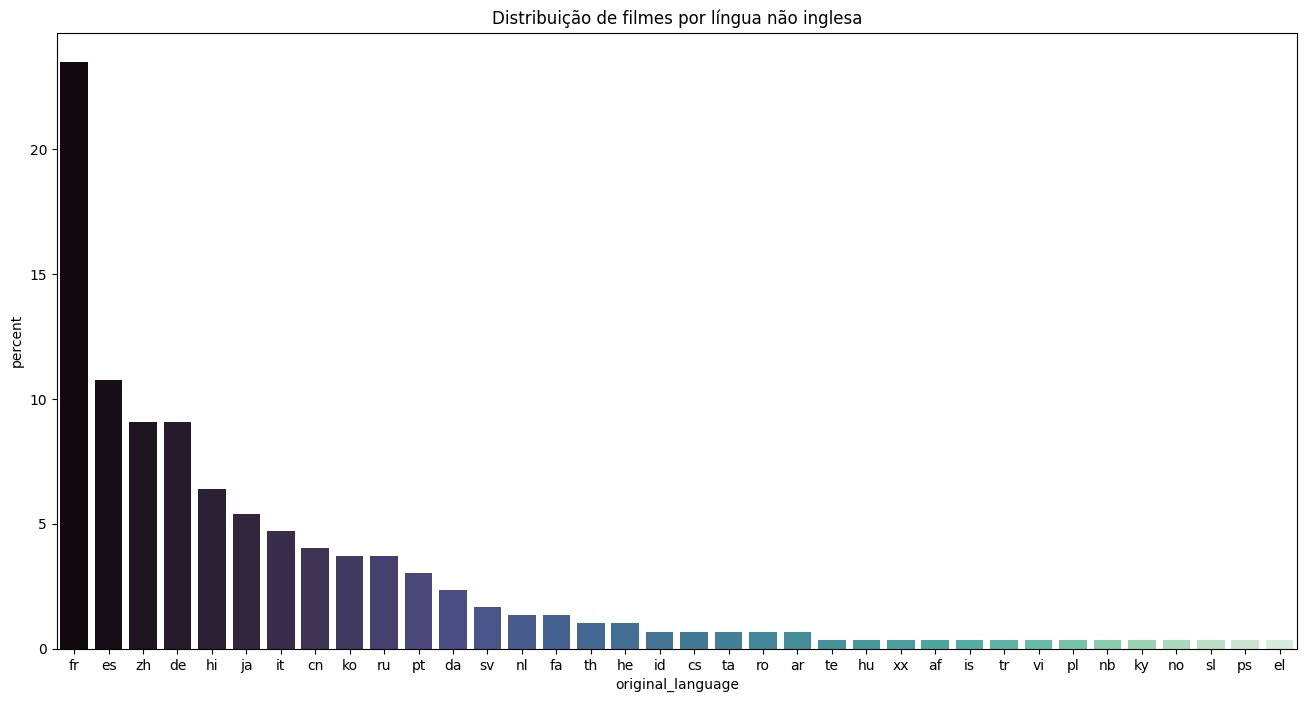

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=tmdb[tmdb['original_language'] != 'en'],
              order = total_de_outros_filmes_por_lingua.index,
              stat = "percent",
              hue= 'original_language',
              hue_order = total_de_outros_filmes_por_lingua.index,
              palette = 'mako',
              x='original_language'
              )
plt.title("Distribuição de filmes por língua não inglesa")
plt.show()

O Pandas e várias outras bibliotecas dão também valores relativos/proporcionais, não apenas absolutos

In [ ]:
total_de_outros_filmes_por_lingua = tmdb.query("original_language != 'en'").original_language.value_counts(normalize=True)
total_de_outros_filmes_por_lingua.head(5)

,proportion
original_language,
fr,0.234899
es,0.107383
zh,0.090604
de,0.090604
hi,0.063758


Testanto Seaborn

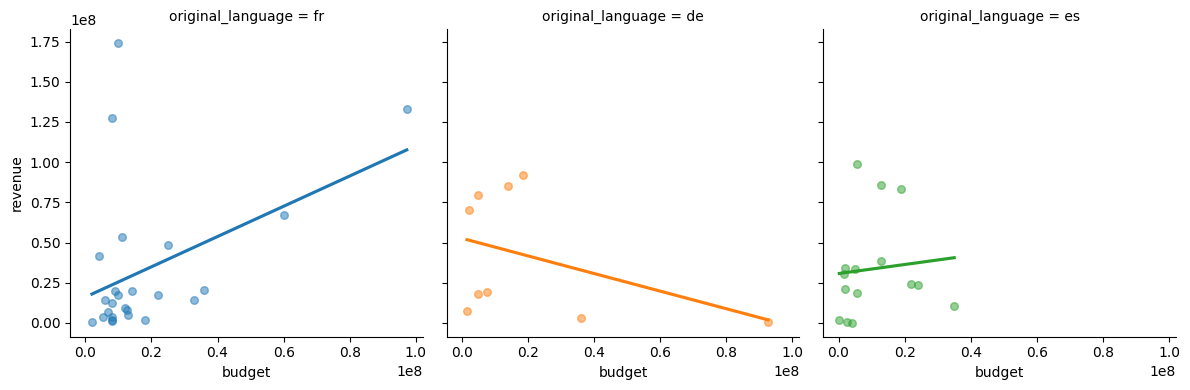

In [ ]:
dados_seaborn = tmdb[["title", "original_language", "budget", "revenue"]]
linguas = ["fr", "es", "de"]
# Mantendo dados com valores de receita e orçamento válidos e nas línguas desejadas (fr, es, de)
fr_es_de_com_revenue_e_budget = dados_seaborn.query("revenue > 0 and budget > 0 and original_language == @linguas")
# Construindo o gráfico de dispersão mais a reta de regressão linear para cada caso
sns.lmplot(data=fr_es_de_com_revenue_e_budget, x="budget", y="revenue", col="original_language",
           hue="original_language", ci=None, height=4, scatter_kws={"s": 30, "alpha": 0.5})

In [ ]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


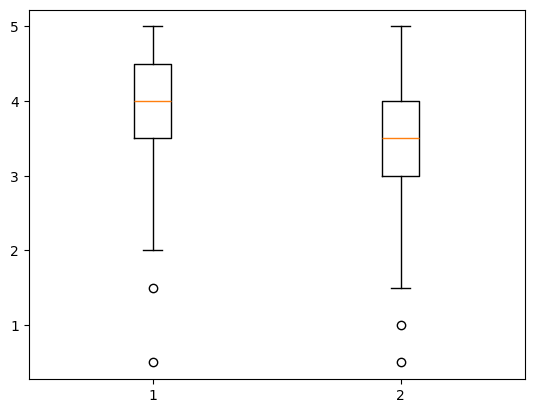

In [ ]:
notas_toy_story = notas[notas['filmeId'] == 1]['nota']
notas_jumanji = notas[notas['filmeId'] == 2]['nota']

#plt: matplotlib
plt.boxplot([notas_toy_story, notas_jumanji])
plt.show()

<Axes: xlabel='filmeId', ylabel='nota'>

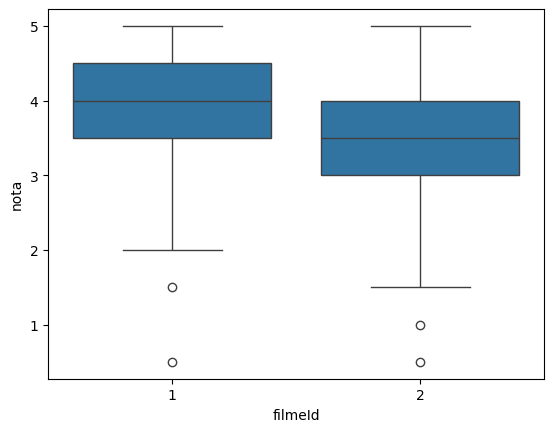

In [ ]:
sns.boxplot(data = notas[notas['filmeId'].isin([1, 2])],
            x = 'filmeId',
            y = 'nota')

In [ ]:
notas.groupby('filmeId').count()

,usuarioId,nota,momento
filmeId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [ ]:
#value_counts(): dados são ordenados automaticamente em ordem decrescente de frequência (do que aparece mais para o que aparece menos).
# .sort_index() para ordenar pelo index filme_Id
notas['filmeId'].value_counts().sort_index()

,count
filmeId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


**DESVIO PADRÃO**

*Exemplo:* Criação de um DataFrame que contém a quantidade de visitas em um website por dia da semana em duas semanas

In [ ]:
import numpy as np
import pandas as pd

dados_website = np.array([[100, 120, 90, 110, 130], [80, 150, 70, 140, 60]])

df_website = pd.DataFrame(dados_website,
                  index = ["Semana 1", "Semana 2"],
                  columns= ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"]
                  )
display(df_website)


,Segunda,Terça,Quarta,Quinta,Sexta
Semana 1,100,120,90,110,130
Semana 2,80,150,70,140,60


In [ ]:
# Calculando o desvio padrão das visitas por semana
desvio_padrao_semana1 = df_website.loc["Semana 1"].std()
desvio_padrao_semana2 = df_website.loc["Semana 2"].std()

print(df_website)
print(f'Desvio Padrão da Semana 1: {desvio_padrao_semana1:.2f}')
print(f'Desvio Padrão da Semana 2: {desvio_padrao_semana2:.2f}')

          Segunda  Terça  Quarta  Quinta  Sexta
Semana 1      100    120      90     110    130
Semana 2       80    150      70     140     60
Desvio Padrão da Semana 1: 15.81
Desvio Padrão da Semana 2: 41.83


Possuímos uma maior dispersão dos dados de visitas na Semana 2 em relação à média semanal (100 visitas), enquanto que na Semana 1 tivemos uma menor dispersão da quantidade de visitas de acordo com a mesma semana (110 visitas).

Trazendo para ciência de dados, podemos interpretar que houve maior instabilidade ou flutuação no número de visitas em diferentes dias da semana na Semana 2, o que pode aumentar o interesse em analisar o que pode ter ocorrido e como planejar um maior engajamento para a semana inteira.